<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DS17_121_t_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Data Science Unit 1 Sprint 2 Module 1*

# T-tests (Inferential Statistics)

## Learning Objectives
- Student can explain the purpose of and be able to identify opportunities and applications for t-tests
- Student can set up and run a one-sample t test on a sample
- Student can set up and run a two-sample t test comparing two samples
- Student can use a p-value to draw the correct conclusion about the null and alternative hypothesis and give a written conclusion

## What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [0]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.head()

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [0]:
# How can we quickly look at some descriptive statistics of the above dataframe?

df.describe()

,a,b
count,5.000000,5.000000
mean,3.000000,6.000000
std,1.581139,3.162278
min,1.000000,2.000000
25%,2.000000,4.000000
50%,3.000000,6.000000
75%,4.000000,8.000000
max,5.000000,10.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       5 non-null      int64
 1   b       5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


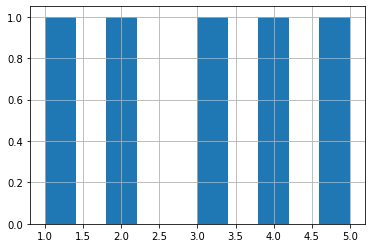

In [0]:
df['a'].hist();

## What is Inferential Statistics?

<https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg>

![Inferential Statistics](https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg)

## Hypothesis Testing (T-Tests)

Drawing conclusions based on probability in the face of randomness



Is the sample reflective of our concept of the population?

In [0]:
import pandas as pd
import numpy as np

In [0]:
# Coinflips example - What is the population?
# Population = Every coinflips that could have ever taken place 
# with a fair coin.

coinflips = np.random.binomial(n=1, p=.5, size=10)

coinflips

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

If we repeat the sampling why does our estimate of the mean move around so much? 

In [0]:
# Coinflips example - See the implications of randomness
coinflips = np.random.binomial(n=1, p=.5, size=10)

coinflips.mean()

0.7

What happens as I increase the sample size? The sample mean deviates less from the...?

In [0]:
# More Information -> Greater Confidence in the face of randomness
coinflips = np.random.binomial(n=1, p=.5, size=100)

coinflips.mean()

0.48

In [0]:
coinflips = np.random.binomial(n=1, p=.5, size=1000000)

coinflips.mean()

0.500106

![Standard Error of the Sample  Mean](https://jungminded.weebly.com/uploads/1/3/5/8/13582285/7285766_orig.jpeg?160)

### Sample Values (latin characters)
$\bar{x}$ = Sample Mean

$s$ = Sample Standard Deviation

$n$ = Sample Size

### Population Values (greek characters)
$\mu$ = Population Mean

$\sigma$ = Population Standard Deviation




**Conclusion: As our sample size goes up, our estimates (of the mean in this case) get more precise, allowing us to infer things about the population with greater confidence.**



## One Sample T-test

What if I didn't have a fair coin?

Comparing information from a sample against our concept of the population.

![One Sample T Statistic](https://www.statisticshowto.com/wp-content/uploads/2015/09/t-score.jpg)

In [0]:
coinflips = np.random.binomial(n=1, p=.6, size=10)

coinflips

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [0]:
coinflips = np.random.binomial(n=1, p=.6, size=10)

coinflips

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1])

In [0]:
coinflips = np.random.binomial(n=1, p=.6, size=10)

coinflips

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

## The T-test Process:

1) Null Hypothesis: This is a fair coin. 

$\mu == \bar{x}$

My belief (my concept of the population) is that this is a fair coin (p=.5) -> $\mu$

What the sample is telling me: $\bar{x}$

2) Alternative Hypothesis (Opposite of the null)

$\mu \neq \bar{x}$

The sample is different enough from my concept of the population, that it's unlikely that my sample came from a fair coin. 

3) Confidence Level: 

How likely does my alternative hypothesis need to be in order for me to reject the null hypothesis?

How willing am I to be tricked by the randomness of sampling?

Convention: 95% Confidence Level

In [0]:
# Lets use a tool called a t-test to test if this is a fair coin or not
coinflips = np.random.binomial(n=1, p=.6, size=100)

coinflips

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [0]:
coinflips.mean()

0.62

In [0]:
from scipy import stats

In [0]:
# pass this function my sample
# and my "concept" of the population (null hypothesis value)
stats.ttest_1samp(coinflips, .05)

Ttest_1sampResult(statistic=11.684356787961717, pvalue=2.435326309990877e-20)

p-value is: The probability of the null hypothesis being true, *given* the sample that we have collected. 

p-value threshold: (1-confidence_level) = (1-.95) =  .05

p-value < .05 -> Reject the Null Hypothesis

p-value >= .05 -> Fail to reject the null hypothesis (I'm not confident enough to rule out the null hypothesis)

Conclusion: Based on a t-statistic of 4.255, and a p-value of .002, I **reject** the null hypothesis that this is a fair coin, and suggest the alternative, that this is an unfair coin. 

## Two Sample T-test

Comparing two groups or samples against each other rather than a single sample against a population. 



Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



In [0]:
xbar1 = 180
s1 = 5

xbar2 = 178.5
s2 = 4.25

sample1 = np.random.normal(xbar1, s1, 1000)
sample2 = np.random.normal(xbar2, s2, 800)

In [0]:
sample1

array([183.02133943, 183.2108419 , 177.05432924, 180.34270649,
       176.29708689, 182.7622925 , 174.93649483, 186.7291875 ,
       182.16805173, 176.32326507, 181.39942457, 185.12363596,
       172.9176919 , 180.65519246, 178.65866927, 178.81917379,
       179.96810107, 183.38630546, 181.41606741, 183.50497983,
       187.97501149, 175.30677254, 179.97201656, 183.85353975,
       175.55526082, 179.8332235 , 182.10844102, 184.29731074,
       179.40282938, 183.07340314, 177.81613677, 178.43351692,
       183.09451208, 188.53669317, 181.0801814 , 185.16372687,
       173.86411038, 179.29034175, 188.32783432, 179.5285762 ,
       178.07398433, 174.2002262 , 176.49840527, 189.42468485,
       180.13638171, 183.42383577, 170.9891513 , 166.93494988,
       177.46853759, 182.5160751 , 179.11197833, 176.42784201,
       189.52031245, 173.86727442, 179.48847224, 181.39714699,
       179.01557329, 184.52534767, 180.06038963, 177.0721349 ,
       192.40840385, 179.34122458, 179.40884616, 187.10

In [0]:
sample2

array([182.33092251, 181.80721592, 179.10587144, 176.38582311,
       176.23557015, 174.59095004, 184.75111908, 182.74202834,
       178.29453041, 179.30769091, 175.3088192 , 179.00463486,
       182.52608548, 177.71994916, 174.51000356, 182.92868859,
       177.02881916, 177.37508633, 172.45758165, 179.83998885,
       174.98711921, 173.95486423, 169.39377267, 175.32402333,
       185.71041651, 177.90775745, 171.8231323 , 181.69767631,
       169.89864843, 184.46528277, 177.45071525, 180.2143412 ,
       181.93124488, 185.03414931, 176.06737055, 173.94847514,
       175.59826805, 180.20506189, 181.42782949, 179.90425066,
       180.97436526, 182.02915453, 165.7692192 , 174.31996262,
       183.76660305, 185.02778104, 179.04040631, 187.75089051,
       176.72492287, 173.9447877 , 185.02393623, 187.27394708,
       180.96689265, 184.55671576, 178.70738587, 180.52902046,
       180.78267746, 178.0048717 , 176.04296306, 181.28698353,
       182.84434287, 182.51093623, 170.06698432, 178.04

1) Null Hypothesis: The two burners cook pancakes at the same rate. 

$\bar{x}_1 == \bar{x}_2$

2) Alternative Hypothesis: The two burners cook pancakes at different rates. 

$\bar{x}_1 \neq \bar{x}_2$

3) Confidence Level: 95%

In [0]:
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=7.22432688732972, pvalue=7.406397609470198e-13)

Based on a t-statistic of 7.22, and a p-value of .00000000000074, I reject the null hypothesis that these two burners cook pancakes at the same rate, and suggest the alternative, that they take different mounts of time (on average) to cook pancakes. 

## Lets Practice more 1-sample and 2-sample T-tests

Using the dataset that you will be using on your assignment

In [0]:
# Grab the file from UCI:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-06-08 21:12:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-06-08 21:12:27 (137 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers)

print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# Replacing Nan with 0.5 can put a weight on number of actual votes which is not the case
df = df.replace({'y': 1, 'n': 0, '?':np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
df.isnull().sum(axis=0)

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [0]:
df['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

## 1) 1 sample example

Null Hypothesis: Congressional Levels of support for the handicapped-infants bill is .5 (50%)

Alternative Hypothesis: Support is different than 50%. 

Confidence Level: 95%

In [0]:
sample = df['handicapped-infants'].dropna()

stats.ttest_1samp(sample, .5)

Ttest_1sampResult(statistic=-2.3957721114055923, pvalue=0.01702012396699793)

In [0]:
#Alternative way for .dropna method
stats.ttest_1samp(df['handicapped-infants'], .5, nan_policy='omit')

Ttest_1sampResult(statistic=-2.3957721114055923, pvalue=0.01702012396699704)

Based on a t-statistic of -2.39 and a p-value of .017, I **reject** the null hypothesis that congressional support for the handicapped-infants bill is equal to 50%.

for lower than 0.05 (5%) we can confidently reject the Null hypothesis while for bigger numbers we "cannot reject" the null hypotheisis (even with a 6% probability). But we won't use the word confirm with 6% probability either!

### detecting the direction of deviation

1) Sign of the t-statistic (negative) -> that the sample mean is less than the null hypothesis value

2) Just look at the sample mean

In [0]:
df['handicapped-infants'].mean()

0.44208037825059104

## 2) 2 sample example

Null Hypothesis: the two sample means are equal. Republican support this bill at the same rate that Democrats do.

Alternative Hypothesis: They support this bill at different rates

Confidence Level: 95%

In [0]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
df['party']== 'democrat'

0      False
1      False
2       True
3       True
4       True
       ...  
430    False
431     True
432    False
433    False
434    False
Name: party, Length: 435, dtype: bool

In [0]:
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
stats.ttest_ind(rep['handicapped-infants'], dem['handicapped-infants'], nan_policy='omit')

Ttest_indResult(statistic=-9.205264294809222, pvalue=1.613440327937243e-18)

Conclusion: 

Based on a t-statistic of -9.2, and a p-value of 0, we **reject** the null hypothesis that republicans and democrats support this bill at the same rate, and suggest the alternative, that republicans and democrats show different levels of support for this bill. 

Do republican or democrats support this bill more?

In [0]:
print(rep['handicapped-infants'].mean())
print(dem['handicapped-infants'].mean())

0.18787878787878787
0.6046511627906976


In [0]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Random sunset of dataframe
df.sample(10, random_state=42)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
280,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
78,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
113,republican,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
253,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
324,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
327,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
291,democrat,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,1.0,0.0,1.0
82,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
365,democrat,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
401,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean falls within a certain $\alpha$ probability of the mean of means.

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means